## Dependencies

In [3]:
from BNReasoner import BNReasoner
import pandas as pd
import numpy as np
from copy import deepcopy

## Utils

In [4]:
def fail_on_float(actual: float, expected: float, eps: float=10-3):
    assert abs(actual - expected) <= eps

## Test implementation

### Test | `Network Pruning`

Before pruning...


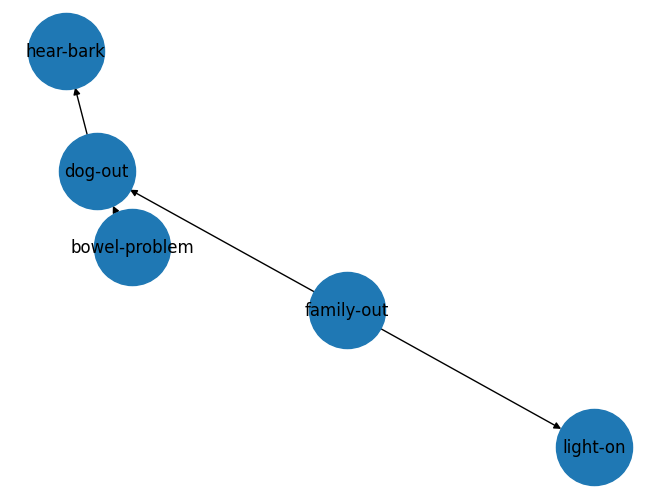

After pruning...


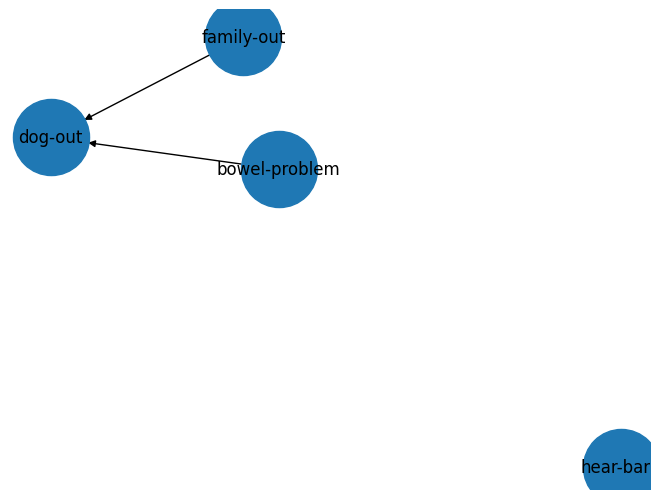

In [5]:
# Init
dog_problem = BNReasoner("testing/dog_problem.BIFXML")

print("Before pruning...")
dog_problem.draw()

# Prune
dog_problem_clone = deepcopy(dog_problem)
dog_problem_clone.prune(Q = {"bowel-problem": None, "hear-bark": None}, e = {"dog-out": None, })

print("After pruning...")
dog_problem_clone.draw()

### Test | `D separation`

In [6]:
dog_problem = BNReasoner("testing/dog_problem.BIFXML")

assert dog_problem.d_separated(X = {"dog-out": None}, Y = {"bowel-problem": None}, Z = {})
assert dog_problem.d_separated(X = {"dog-out": None}, Y = {"hear-bark": None}, Z = {"dog-out": None, }) is False

### Test | `Maxing out variables`

In [7]:
"""
: BN course 4 -> pag. 11
:return:
"""
initial = pd.DataFrame(columns=["B", "C", "D", "f1"], data=np.array([
    [True, True, True, 0.95],
    [True, True, False, 0.05],
    [True, False, True, 0.90],
    [True, False, False, 0.10],
    [False, True, True, 0.80],
    [False, True, False, 0.20],
    [False, False, True, 0.00],
    [False, False, False, 1.00],
]))

expected = pd.DataFrame(columns=["B", "C", "max_D > f1"], data=np.array([
    [True, True, 0.95],
    [True, False, 0.9],
    [False, True, 0.8],
    [False, False, 1],
]))

actual = BNReasoner.maxing_out("D", initial)
assert actual.equals(expected)

### Test | `Summing out variables`

In [8]:
"""
: BN course 4 -> pag. 11
:return:
"""
initial = pd.DataFrame(columns=["B", "C", "D", "f1"], data=np.array([
    [True, True, True, 0.95],
    [True, True, False, 0.05],
    [True, False, True, 0.90],
    [True, False, False, 0.10],
    [False, True, True, 0.80],
    [False, True, False, 0.20],
    [False, False, True, 0.00],
    [False, False, False, 1.00],
]))

expected = pd.DataFrame(columns=["B", "C", "sum_D > f1"], data=np.array([
    [True, True, 1.0],
    [True, False, 1.0],
    [False, True, 1.0],
    [False, False, 1.0],
]))

actual = BNReasoner.marginalization("D", initial)
assert actual.equals(expected)

### Test | `Factor multiplication`

In [9]:
"""
: BN course 3 -> pag. 10
:return:
"""
first = pd.DataFrame(columns=["B", "C", "D", "f1"], data=np.array([
    [True, True, True, 0.95],
    [True, True, False, 0.05],
    [True, False, True, 0.90],
    [True, False, False, 0.10],
    [False, True, True, 0.80],
    [False, True, False, 0.20],
    [False, False, True, 0.00],
    [False, False, False, 1.00],
]))

second = pd.DataFrame(columns=["D", "E", "f2"], data=np.array([
    [True, True, 0.448],
    [True, False, 0.192],
    [False, True, 0.112],
    [False, False, 0.248],
]))

expected_first_2_rows = pd.DataFrame(columns=["B", "C", "D", "E", "f1 * f2"], data=np.array([
    [True, True, True, True, 0.95 * 0.448],
    [True, True, True, False, 0.95 * 0.192],
]))

actual = BNReasoner.factor_multiplication(first, second)
actual_first_2_rows = actual.iloc[0:2]
assert actual_first_2_rows.equals(expected_first_2_rows)

### Test | `Marginal Distribution`

In [10]:
dog_problem = BNReasoner("testing/dog_problem.BIFXML")

dog_problem.marginal_distribution(Q={"dog-out": True, "bowel-problem": True}, e={})

,bowel-problem,dog-out,sum_family-out > p * p
0,True,True,0.7227
1,True,False,1.2573
2,False,True,0.0011
3,False,False,0.0189
